In [24]:
import torch
from torchvision.datasets import ImageFolder
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai

In [2]:
pwd()

'/notebooks/sign-language'

In [4]:
path='/notebooks/sign-language/data/asl_alphabet_train/asl_alphabet_train'

In [5]:
sign=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    batch_tfms=aug_transforms())

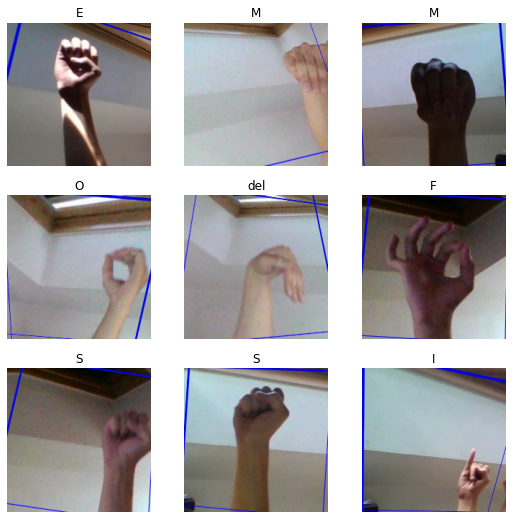

In [6]:
dls=sign.dataloaders(path)
dls.show_batch()

In [7]:
learn=cnn_learner(dls,resnet50,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.154186,0.069659,0.023218,18:42


epoch,train_loss,valid_loss,error_rate,time
0,0.022845,0.008999,0.002874,24:45
1,0.023096,0.001982,0.000632,24:43
2,0.006303,0.000671,0.000115,24:43
3,0.001034,0.000050,0.000000,24:42


In [9]:
learn.export()

In [16]:

path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [17]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl

Output()

In [18]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred


Label(value='Prediction: A; Probability: 1.0000')